# Создание RAG с нуля

## Что такое RAG?

RAG расшифровывается как Retrieval Augmented Generation (Генерация с дополнением поиском). RAG‑подход позволяет модели запрашивать актуальные сведения из внешних источников (баз знаний) во время генерации ответа. Это обеспечивает более точные и актуальные ответы, опирающиеся на факты, а не только на память модели.

Каждый шаг можно приблизительно разбить на следующие этапы:

- **Поиск (Retrieval)** — Поиск релевантной информации из источника по заданному запросу. 
- **Дополнение (Augmented)** — Использование найденной релевантной информации для модификации входных данных генеративной модели.
- **Генерация (Generation)** — Генерация ответа с учетом дополнительно найденной релевантной информации.

## Зачем нужен RAG?

Основная цель RAG — улучшить выходные данные (результаты генерации) LLM.

Можно выделить два основных улучшения:

1.  **Предотвращение галлюцинаций** — LLM склонны к возможным галлюцинациям, то есть к генерации того, что выглядит правильно, но таковым не является. RAG могут помочь LLM генерировать более фактически точные выводы, предоставляя им фактические (найденные) входные данные. И даже если сгенерированный ответ из RAG кажется неверным, благодаря системе поиска у вас также есть доступ к источникам, откуда он был взят.
2.  **Работа с пользовательскими данными** — Многие базовые LLM обучаются на текстовых данных интернет-масштаба. Это означает, что они обладают отличной способностью моделировать язык, однако им часто не хватает конкретных знаний. Системы RAG могут предоставлять LLM предметно-ориентированные данные, такие как медицинская информация или корпоративная документация, и, таким образом, настраивать их выводы в соответствии с конкретными случаями использования.

RAG также может быть гораздо более быстрым решением для внедрения, чем fine-tuning LLM на конкретных данных.

## Для каких задач можно использовать RAG?

RAG может помочь в любых ситуациях, где существует определенный набор информации, который может отсутствовать в обучающих данных LLM (например, любые данные, не являющиеся общедоступными в интернете).

Например, RAG можно использовать для:

*   **Чат для вопросов и ответов в службе поддержки клиентов** — Используя существующую документацию поддержки клиентов в качестве ресурса, когда клиент задает вопрос, система может извлекать релевантные фрагменты документации, а LLM — формировать из этих фрагментов ответ. Это можно рассматривать как «чат-бота для документации». 
*   **Анализ цепочек писем** — Допустим, вы страховая компания с длинными переписками по электронной почте между клиентами и страховыми агентами. Вместо того чтобы искать в каждом отдельном письме, вы можете извлекать соответствующие отрывки и поручить LLM создавать структурированные описания страховых случаев.
*   **Чат с внутренней документацией компании** — Если вы работали в крупной компании, вы знаете, как иногда трудно получить ответ. Почему бы не позволить системе RAG проиндексировать корпоративную информацию и поручить LLM отвечать на ваши вопросы? Преимущество RAG в том, что у вас будут ссылки на ресурсы, чтобы узнать больше, если ответ LLM окажется недостаточным.
*   **Вопросы и ответы по учебнику** — Допустим, вы готовитесь к экзаменам и постоянно листаете толстый учебник в поисках ответов на свои вопросы. RAG может помочь предоставить ответы, а также ссылки для углубленного изучения.


## Ключевые термины

| Термин | Описание |
|---|---|
| **Токен (Token)** | Часть текста, меньшая, чем слово. Например, фраза "hello, world!" может быть разбита на ["hello", ",", "world", "!"]. Токеном может быть целое слово, часть слова или группа знаков препинания. 1 токен ≈ 4 символам в английском языке, 100 токенов ≈ 75 словам. Текст разбивается на токены перед передачей в LLM. |
| **Векторное представление, эмбеддинг (Embedding)** | Изученное числовое представление фрагмента данных. Например, предложение текста может быть представлено вектором из 768 значений. В идеале схожие по смыслу фрагменты текста будут иметь схожие значения векторов. |
| **Модель для получения векторных представлений (Embedding model)** | Модель, предназначенная для приема входных данных и вывода числового представления. Например, текстовая модель для получения векторных представлений может принимать 384 токена текста и преобразовывать их в вектор размером 768. Эта модель может и часто отличается от модели LLM. |
| **Поиск по сходству / векторный поиск (Similarity search / vector search)** | Цель поиска по сходству / векторного поиска — найти два вектора, которые находятся близко друг к другу в высокоразмерном пространстве. Например, два схожих отрывка текста, пропущенных через модель для получения векторных представлений, должны иметь высокий показатель сходства, в то время как два отрывка текста на разные темы будут иметь более низкий показатель. Распространенными мерами оценки сходства являются скалярное произведение и косинусное сходство. |
| **Большая языковая модель (LLM)** | Модель, обученная численно представлять закономерности в тексте. Генеративная LLM будет продолжать последовательность, получив последовательность на входе. Например, получив последовательность текста "hello, world!", генеративная LLM может выдать "we're going to build a RAG pipeline today!". Это сгенерированное продолжение сильно зависит от обучающих данных и промпта. |
| **Контекстное окно LLM (LLM context window)** | Количество токенов, которое LLM может принять на вход. Например, по состоянию на март 2024 года, GPT-4 имеет контекстное окно по умолчанию в 32 тыс. токенов (около 96 страниц текста), но при необходимости может быть увеличено до 128 тыс. Недавняя открытая LLM от Google, Gemma (март 2024), имеет контекстное окно в 8 тыс. / 32 тыс. токенов (около 24 страниц текста). Большее контекстное окно означает, что LLM может принять больше релевантной информации для помощи в ответе на запрос. Например, в конвейере RAG, если у модели больше контекстное окно, она может принять больше референсных элементов от системы поиска для помощи в генерации. |
| **Промпт (Prompt)** | Распространенный термин для описания входных данных для генеративной LLM. Идея «инженерии промптов» (prompt engineering) состоит в том, чтобы структурировать текстовый (или потенциально также графический) вход для генеративной LLM определенным образом, чтобы сгенерированный выход был оптимальным. Эта техника возможна благодаря способности LLM к обучению в контексте, то есть она может использовать свое представление о языке для анализа промпта и определения, каким может быть подходящий вывод (примечание: вывод LLM вероятностный, поэтому используются такие термины, как «может вывести»). |

## 1. Обработка pdf и создание эмбединга

**Шаги**:
1.  Импортировать PDF-документ.
2.  Обработать текст для создания векторных представлений (например, разбить на фрагменты (чанки) из предложений).
3.  Создать векторные представления (эмбединги) для текстовых фрагментов (чанков) с помощью выбранной модели.
4.  Сохранить векторные представления в файл для последующего использования.

In [5]:
import fitz
from tqdm.auto import tqdm 
import os
import requests

pdf_path = "metrics.pdf"

def text_formatter(text: str) -> str:
    # удаляем символы переноса строки (\n), заменяя их на пробелы
    # и удаляем лишние пробелы в начале и конце строки 
    cleaned_text = text.replace("\n", " ").strip()
    
    return cleaned_text


def open_and_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path) 
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)): 
        text = page.get_text()  
        text = text_formatter(text)
        pages_and_texts.append({"page_number": page_number, 
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,  # 1 token = ~4 chars
                                "text": text})
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': 0,
  'page_char_count': 1584,
  'page_word_count': 283,
  'page_sentence_count_raw': 26,
  'page_token_count': 396.0,
  'text': 'ОСНОВНЫЕ ПРОДУКТОВЫЕ МЕТРИКИ    1. Выручка (Revenue).  Базовый показатель продукта.    2. Новые клиенты (New clients).  Помогает понять рост бизнеса, эффективность рекламной кампании, прогнозирование  дохода и т. д.    3-5. DAU / WAU / MAU (Daily / Weekly / Monthly Active Users).  Количество активных пользователей в день / неделю / месяц.    6-7. ARPPU (Average Revenue Per Paying User).  Общий доход платящих пользователей / Количество платящих пользователей.    Эта метрика отражает средний доход пользователя за определенный период.  Аналогично определяется ARPU, только в знаменателе стоит общее количество  пользователей за период. Ясно, что всегда ARPPU >= ARPU.    Также если продукт специфичен к выбросам, то рекомендую смотреть ещё  медианный доход от одного пользователя.    8. RR (Retention Rate).  Пусть у нас есть когорта людей: т. е. груп

In [6]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,0,1584,283,26,396.00,ОСНОВНЫЕ ПРОДУКТОВЫЕ МЕТРИКИ 1. Выручка (Re...
1,1,1519,270,25,379.75,9. Stickness = (Средний DAU) / MAU. Очень важ...
2,2,1498,286,30,374.50,"Например, компания потратила на рекламу сервис..."
3,3,1533,266,24,383.25,Важно: эта метрика может считаться кучей спосо...
4,4,193,30,4,48.25,20. Product Return Rate. Количество возвращен...


In [8]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,11.00,11.00,11.00,11.00,11.00
mean,5.00,1391.18,248.55,24.09,347.80
std,3.32,686.60,107.48,7.52,171.65
min,0.00,193.00,30.00,4.00,48.25
25%,2.50,1161.00,227.50,22.50,290.25
50%,5.00,1533.00,283.00,26.00,383.25
75%,7.50,1905.00,321.00,28.50,476.25
max,10.00,2075.00,352.00,31.00,518.75


### Разбиение страниц на предложения

**Зачем разбивать на предложения?**

*   С ними легче работать, чем с большими страницами текста (особенно если страницы плотно заполнены текстом).
*   Можно получить более конкретную информацию и выяснить, какая именно группа предложений была использована для помощи в рамках RAG.


Используем spaCy для разделения текста на предложения, так как это, вероятно, немного надежнее, чем просто использование `text.split(". ")`. 

In [55]:
import spacy
from spacy.lang.ru import Russian  
nlp = Russian()
nlp.add_pipe("sentencizer")  

text = "Это первое предложение. А это уже второе предложение! И даже третье?"
doc = nlp(text)

print(f"Количество предложений: {len(list(doc.sents))}")

sentences = list(doc.sents)
print("Предложения в документе:")
for i, sent in enumerate(sentences, 1):
    print(f"{i}. '{sent.text}'")

Количество предложений: 3
Предложения в документе:
1. 'Это первое предложение.'
2. 'А это уже второе предложение!'
3. 'И даже третье?'


In [56]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/11 [00:00<?, ?it/s]

In [73]:
import random
random.sample(pages_and_texts, k=1)

[{'page_number': 2,
  'page_char_count': 1498,
  'page_word_count': 286,
  'page_sentence_count_raw': 30,
  'page_token_count': 374.5,
  'text': 'Например, компания потратила на рекламу сервиса на Яндекс.Директе — 40 тыс. руб.,  а на Google Ads — 60 тыс. руб. Получили 25 клиентов с первого канала трафика и 75  клиентов со второго. Тогда стоимость клиента будет:    CAC = (40000 + 60000) / (25 клиентов + 75 клиентов) = 1000.    Это один из способов посчитать CAC: т. е. мы считаем только маркетинговые  затраты на привлечение клиента. Можно посчитать другим способом, а именно:  учесть как можно больше затрат на привлечение клиента:    1) на рекламу;  2) оплату работы маркетолога и сейлза;  3) себестоимость продукта;  4) оплату работы оборудования;  5) другие затраты.    Более подробно можно почитать тут.    13. ROI (Return On Investment).  (Доход с проекта — затраты на проект) / затраты на проект * 100%.    Также, как и CAC, считается основной маркетинговой метрикой. Более подробно  можно 

Пу-пу-пу, разбилось как-то не очень, попробуем как-то обработать аббревиатуры.

In [74]:
import spacy
from spacy.lang.ru import Russian
import re

nlp = Russian()

ABBREVIATIONS = [
    "т. е.",
    "т.е.",
    "т. д.",
    "т.д.",
    "т. п.",
    "т.п.",
    "тыс.",
    "руб.",
    "Яндекс.Директе"
]

abbrev_regex = re.compile(
    "(" + "|".join(map(re.escape, ABBREVIATIONS)) + ")",
    flags=re.IGNORECASE
)

@nlp.component("abbrev_merger")
def abbrev_merger(doc):
    with doc.retokenize() as retok:
        for match in abbrev_regex.finditer(doc.text):
            span = doc.char_span(match.start(), match.end())
            if span:
                retok.merge(span)
    return doc

nlp.add_pipe("abbrev_merger", first=True)
nlp.add_pipe("sentencizer")

original_text = """Например, компания потратила на рекламу сервиса на Яндекс.Директе — 40 тыс. руб., а на Google Ads — 60 тыс. руб. Получили 25 клиентов с первого канала трафика и 75 клиентов со второго. Тогда стоимость клиента будет: CAC = (40000 + 60000) / (25 клиентов + 75 клиентов) = 1000. Это один из способов посчитать CAC: т. е. мы считаем только маркетинговые затраты на привлечение клиента."""

doc = nlp(original_text)

for sent in doc.sents:
    print("•", sent.text)

print("Всего:", len(list(doc.sents)))


• Например, компания потратила на рекламу сервиса на Яндекс.Директе — 40 тыс. руб., а на Google Ads — 60 тыс. руб. Получили 25 клиентов с первого канала трафика и 75 клиентов со второго.
• Тогда стоимость клиента будет: CAC = (40000 + 60000) / (25 клиентов + 75 клиентов) = 1000.
• Это один из способов посчитать CAC: т. е. мы считаем только маркетинговые затраты на привлечение клиента.
Всего: 3


In [75]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/11 [00:00<?, ?it/s]

In [76]:
pages_and_texts[2]

{'page_number': 2,
 'page_char_count': 1498,
 'page_word_count': 286,
 'page_sentence_count_raw': 30,
 'page_token_count': 374.5,
 'text': 'Например, компания потратила на рекламу сервиса на Яндекс.Директе — 40 тыс. руб.,  а на Google Ads — 60 тыс. руб. Получили 25 клиентов с первого канала трафика и 75  клиентов со второго. Тогда стоимость клиента будет:    CAC = (40000 + 60000) / (25 клиентов + 75 клиентов) = 1000.    Это один из способов посчитать CAC: т. е. мы считаем только маркетинговые  затраты на привлечение клиента. Можно посчитать другим способом, а именно:  учесть как можно больше затрат на привлечение клиента:    1) на рекламу;  2) оплату работы маркетолога и сейлза;  3) себестоимость продукта;  4) оплату работы оборудования;  5) другие затраты.    Более подробно можно почитать тут.    13. ROI (Return On Investment).  (Доход с проекта — затраты на проект) / затраты на проект * 100%.    Также, как и CAC, считается основной маркетинговой метрикой. Более подробно  можно почита

Получилось уже приличнее.

In [77]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,11.00,11.00,11.00,11.00,11.00,11.00
mean,5.00,1391.18,248.55,24.09,347.80,23.00
std,3.32,686.60,107.48,7.52,171.65,8.52
min,0.00,193.00,30.00,4.00,48.25,4.00
25%,2.50,1161.00,227.50,22.50,290.25,19.50
50%,5.00,1533.00,283.00,26.00,383.25,21.00
75%,7.50,1905.00,321.00,28.50,476.25,30.50
max,10.00,2075.00,352.00,31.00,518.75,34.00


### Разделение предложений на блоки (чанки)

Зачем мы это делаем?

1.  **Проще управлять** блоками текста схожего размера.
2.  **Не перегружать** предельную емкость моделей эмбеддинга по токенам (например, если модель `all-mpnet-base-v2` эмбеддинга имеет емкость в 384 токена, может произойти потеря информации при попытке создать эмбеддинг для последовательности из 400+ токенов).
3.  Контекстное окно **LLM (количество токенов, которое LLM может принять на вход) может быть ограничено** и требует вычислительной мощности, поэтому мы хотим убедиться, что используем его максимально эффективно.

Пока что просто разобьем наши страницы с предложениями на группы по 10 предложений. Это даст достаточно места для обработки текста моделью `all-mpnet-base-v2` (ее емкость — 384 токена).

In [78]:
num_sentence_chunk_size = 10 

def split_list(input_list: list, 
               slice_size: int) -> list[list[str]]:
    return [input_list[i:i + slice_size] for i in range(0, len(input_list), slice_size)]

for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                         slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/11 [00:00<?, ?it/s]

In [81]:
pages_and_texts[2]

{'page_number': 2,
 'page_char_count': 1498,
 'page_word_count': 286,
 'page_sentence_count_raw': 30,
 'page_token_count': 374.5,
 'text': 'Например, компания потратила на рекламу сервиса на Яндекс.Директе — 40 тыс. руб.,  а на Google Ads — 60 тыс. руб. Получили 25 клиентов с первого канала трафика и 75  клиентов со второго. Тогда стоимость клиента будет:    CAC = (40000 + 60000) / (25 клиентов + 75 клиентов) = 1000.    Это один из способов посчитать CAC: т. е. мы считаем только маркетинговые  затраты на привлечение клиента. Можно посчитать другим способом, а именно:  учесть как можно больше затрат на привлечение клиента:    1) на рекламу;  2) оплату работы маркетолога и сейлза;  3) себестоимость продукта;  4) оплату работы оборудования;  5) другие затраты.    Более подробно можно почитать тут.    13. ROI (Return On Investment).  (Доход с проекта — затраты на проект) / затраты на проект * 100%.    Также, как и CAC, считается основной маркетинговой метрикой. Более подробно  можно почита

In [82]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,5.00,1391.18,248.55,24.09,347.80,23.00,2.73
std,3.32,686.60,107.48,7.52,171.65,8.52,1.01
min,0.00,193.00,30.00,4.00,48.25,4.00,1.00
25%,2.50,1161.00,227.50,22.50,290.25,19.50,2.00
50%,5.00,1533.00,283.00,26.00,383.25,21.00,3.00
75%,7.50,1905.00,321.00,28.50,476.25,30.50,3.50
max,10.00,2075.00,352.00,31.00,518.75,34.00,4.00


### Представляем чанки как отдельные единицы 

Это нужно для дальнейшего их представления в виде эмбедингов. 

In [83]:
import re

pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~4 characters
        
        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/11 [00:00<?, ?it/s]

30

In [84]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 1,
  'sentence_chunk': '9. Stickness = (Средний DAU) / MAU. Очень важная метрика, которая показывает, насколько "липким" является ваш продукт.Как это интерпретировать?  Например, если Stickness равен 25% и в месяце 30 дней, то это означает, что в среднем клиенты использовали ваш продукт 1 / 4 * 30 ~ 7,5 дней.  Вообще говоря, в знаменателе может стоять и WAU.При этом можно модифицировать эту метрику как угодно.  Представим, что мы проводим однодневную акцию 10 раз за месяц, тогда можно взять средний DAU за эти 10 акций и поделить на общее количество пользователей, которые пришли за эти 10 акционных дней.  10.Конверсия в целевое действие (Conversion Rate).',
  'chunk_char_count': 638,
  'chunk_word_count': 104,
  'chunk_token_count': 159.5}]

Посмотрим на статистику по чанкам.

In [85]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,30.00,30.00,30.00,30.00
mean,5.43,494.33,76.00,123.58
std,3.07,299.87,47.22,74.97
min,0.00,29.00,4.00,7.25
25%,3.00,253.50,38.25,63.38
50%,6.00,529.00,85.50,132.25
75%,8.00,656.75,101.75,164.19
max,10.00,1168.00,186.00,292.00


### Создаем эмбеддинги текстовых чанков 

Для этого будем использовать `all-mpnet-base-v2` ([Hugging Face model card](https://huggingface.co/sentence-transformers/all-mpnet-base-v2#intended-uses)).

In [101]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", 
                                      device="cpu") 

single_sentence = "Я люблю котиков!"
single_embedding = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
print(f"Embedding:\n{single_embedding}")
print(f"Embedding size: {single_embedding.shape}")

Sentence: Я люблю котиков!
Embedding:
[ 3.74788754e-02 -8.54069018e-04  6.01340551e-03 -1.63538614e-03
  2.65251789e-02 -1.59051223e-03 -1.22146867e-02  1.91820376e-02
  3.69927436e-02  1.64478123e-02 -1.35071613e-02 -2.11793724e-02
 -4.02485318e-02 -5.30911982e-03  2.52413563e-02 -9.94448271e-03
  5.60634490e-03 -2.58901790e-02  5.64791029e-03 -2.07266081e-02
  8.77064653e-03  5.84918596e-02 -2.66106818e-02 -1.44941332e-02
  9.65874700e-04  1.41744688e-02  5.95984422e-02 -2.43012793e-02
  3.20155658e-02  7.29013458e-02  3.41219734e-03  1.43149588e-02
 -3.52530405e-02  1.53998993e-02  1.91160211e-06  1.93398837e-02
 -5.90179209e-03 -6.86411140e-03 -6.05050027e-02 -5.74271055e-03
  7.13875145e-02 -8.24553818e-02 -5.76495193e-02 -3.19349281e-02
 -2.47955490e-02  5.52781112e-03  2.48966110e-03  2.18195822e-02
  5.50214993e-03  6.03301860e-02  3.21284570e-02 -4.35200669e-02
 -7.65612675e-03  1.04862126e-02  1.01313777e-02 -2.87974309e-02
  8.95805424e-04  4.13353462e-03 -3.10966815e-03 -9.

Эмбеддинг имеет размерность `(768,)`, что означает, что это вектор из 768 чисел, который представляет наш текст в многомерном пространстве.

> **Примечание:** Независимо от размера текстового ввода в нашу модель `all-mpnet-base-v2`, он будет преобразован в эмбеддинг размером `(768,)`. Это значение фиксировано. Поэтому, будет ли предложение длиной в 1 токен или 1000 токенов, оно будет обрезано/дополнено нулями до размера 384, а затем преобразовано в вектор эмбеддинга размером `(768,)`. Конечно, другие модели эмбеддингов могут иметь другие размеры ввода/вывода.

In [90]:
%%time

embedding_model.to("cuda") 

for item in tqdm(pages_and_chunks):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/30 [00:00<?, ?it/s]

CPU times: total: 5.58 s
Wall time: 1.24 s


Можно сделать еще быстрее.

In [91]:
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks]

In [97]:
%%time

text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32, 
                                               convert_to_tensor=True) 

text_chunk_embeddings

CPU times: total: 1.03 s
Wall time: 182 ms


tensor([[ 0.0527, -0.0368, -0.0193,  ..., -0.0147, -0.0086, -0.0340],
        [ 0.0094, -0.0180, -0.0191,  ...,  0.0275, -0.0060, -0.0100],
        [ 0.0498, -0.1180, -0.0141,  ...,  0.0455, -0.0493, -0.0316],
        ...,
        [ 0.0192, -0.0344,  0.0259,  ...,  0.0634, -0.0281, -0.0201],
        [ 0.0857, -0.0471,  0.0002,  ...,  0.0459, -0.0904, -0.0507],
        [ 0.0507, -0.1153, -0.0111,  ...,  0.0016, -0.0735, -0.0522]],
       device='cuda:0')

Получили ускорение прммерно в 3 раза на используемом GPU.

In [95]:
# Сохраняем эмбеддинги в файл
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [96]:
# Проверим, хорошо ли все сохранилось
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,0,ОСНОВНЫЕ ПРОДУКТОВЫЕ МЕТРИКИ 1.Выручка (Reven...,375,57,93.75,[ 5.27168997e-02 -3.68040726e-02 -1.93460621e-...
1,0,Общий доход платящих пользователей / Количеств...,1168,186,292.00,[ 9.41784587e-03 -1.80210173e-02 -1.91357210e-...
2,1,9. Stickness = (Средний DAU) / MAU. Очень важн...,638,104,159.50,[ 4.98262197e-02 -1.18026584e-01 -1.40573271e-...
3,1,"Количество пользователей, совершивших целевое ...",606,94,151.50,[ 2.89275162e-02 -5.34057096e-02 -2.10830085e-...
4,1,"Например, а как считать, что пользователь от н...",233,32,58.25,[ 1.61532536e-02 -2.46217940e-03 1.79438293e-...


### Поиск по схожести

In [98]:
import random

import torch
import numpy as np 
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([30, 768])

In [102]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", 
                                      device=device) 

Хотим на основе pdf ответить на вопрос "Что такое ARPPU (Average Revenue Per Paying User)?"

Мы можем сделать это, выполнив следующие шаги:

1. Определить строку запроса.
2. Преобразовать строку запроса в эмбеддинг с помощью той же модели, которую мы использовали для создания эмбеддингов текстовых блоков.
3. Выполнить операцию скалярного произведения или косинусного сходства между эмбеддингами текстов и эмбеддингом запроса, чтобы получить оценки схожести.
4. Отсортировать результаты шага 3 в порядке убывания (более высокая оценка означает большую схожесть в представлении модели) и использовать эти значения для анализа текстов.

In [111]:
query = "Что такое ARPPU (Average Revenue Per Paying User)"
print(f"Query: {query}")

query_embedding = embedding_model.encode(query, convert_to_tensor=True)

from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: Что такое ARPPU (Average Revenue Per Paying User)
Time take to get scores on 30 embeddings: 0.00015 seconds.


torch.return_types.topk(
values=tensor([0.7233, 0.5559, 0.5475, 0.4953, 0.4807], device='cuda:0'),
indices=tensor([0, 7, 5, 9, 6], device='cuda:0'))

Проверим результаты первоначального поиска по схожести.

`torch.topk` возвращает кортеж значений (оценок) и индексов для этих оценок.

Индексы соответствуют тому, какие индексы в тензоре эмбеддингов имеют какие оценки по отношению к эмбеддингу запроса (чем выше, тем лучше).

Мы можем использовать эти индексы для сопоставления с нашими текстовыми блоками.

Теперь мы можем перебрать кортеж `top_results_dot_product`, сопоставить оценки и индексы, а затем использовать эти индексы для индексации нашей переменной `pages_and_chunks`, чтобы получить нужный фрагмент текста.

In [112]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)
    
print(f"Query: '{query}'\n")
print("Results:")
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}"
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'Что такое ARPPU (Average Revenue Per Paying User)'

Results:
Score: 0.7233
Text:
ОСНОВНЫЕ ПРОДУКТОВЫЕ МЕТРИКИ  1.Выручка (Revenue). Базовый показатель продукта.
2.Новые клиенты (New clients). Помогает понять рост бизнеса, эффективность
рекламной кампании, прогнозирование дохода и т. д.  3-5. DAU / WAU / MAU (Daily
/ Weekly / Monthly Active Users). Количество активных пользователей в день /
неделю / месяц.  6-7. ARPPU (Average Revenue Per Paying User).
Page number: 0


Score: 0.5559
Text:
Важно: эта метрика может считаться кучей способов, рекомендую прочитать вот эту
статью и выбрать для себя более подходящий.  16. Revenue Retention Rate (RRR).
Эта метрика показывает, какая часть выручки от существующих клиентов сохраняется
на определенный период времени, не учитывая новые доходы от новых клиентов.Т. е.
Выручка от текущих клиентов (не считая новых) на конец периода / Выручка от
текущих клиентов на начало периода * 100%.  Например, если компания начала месяц
с выручкой в 100 тыс.

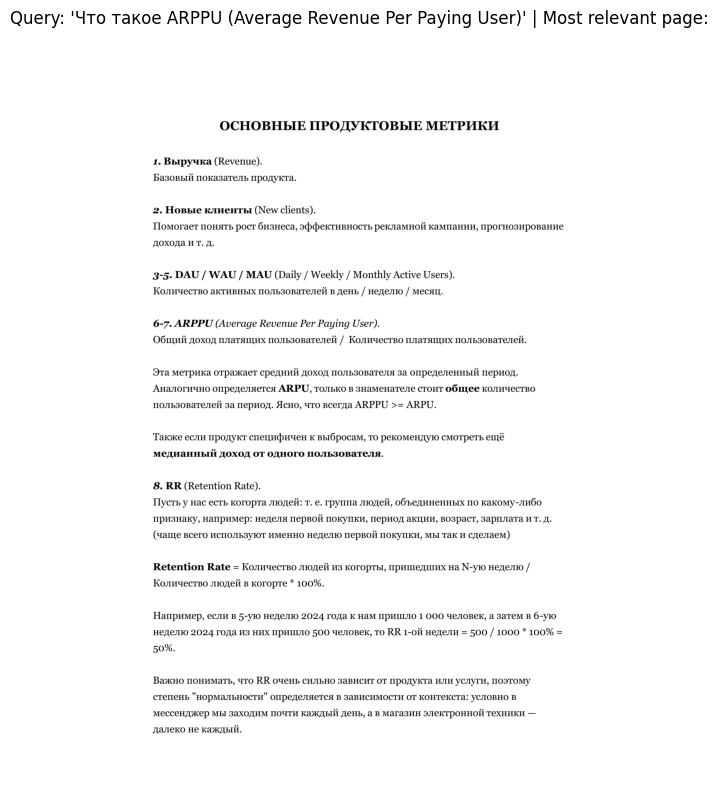

In [114]:
import fitz

pdf_path = "metrics.pdf" 
doc = fitz.open(pdf_path)
page = doc.load_page(0) 
img = page.get_pixmap(dpi=300)
doc.close()

img_array = np.frombuffer(img.samples_mv, 
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') 
plt.show()

Создадим функцию.

In [123]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Преобразует запрос в эмбеддинг с помощью модели и возвращает топ-k оценок и индексов из эмбеддингов.
    """

    # Преобразуем запрос в эмбеддинг
    query_embedding = model.encode(query, 
                                   convert_to_tensor=True) 

    # Получаем оценки скалярного произведения для эмбеддингов
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Время получения оценок для {len(embeddings)} эмбеддингов: {end_time-start_time:.5f} секунд.")

    scores, indices = torch.topk(input=dot_scores, 
                                 k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Принимает запрос, извлекает наиболее релевантные ресурсы и выводит их в порядке убывания.
    """
    
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)
    
    print(f"Query: {query}\n")
    print("Results:")
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        # Выводим релевантный текстовый блок (поскольку оценки в порядке убывания, самый релевантный блок будет первым)
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")

In [121]:
query = "Что такое ARPPU (Average Revenue Per Paying User)"

scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

[INFO] Время получения оценок для 30 эмбеддингов: 0.00005 секунд.


(tensor([0.7233, 0.5559, 0.5475, 0.4953, 0.4807], device='cuda:0'),
 tensor([0, 7, 5, 9, 6], device='cuda:0'))

In [122]:
print_top_results_and_scores(query=query,
                             embeddings=embeddings)

[INFO] Время получения оценок для 30 эмбеддингов: 0.00006 секунд.
Query: Что такое ARPPU (Average Revenue Per Paying User)

Results:
Score: 0.7233
ОСНОВНЫЕ ПРОДУКТОВЫЕ МЕТРИКИ  1.Выручка (Revenue). Базовый показатель продукта.
2.Новые клиенты (New clients). Помогает понять рост бизнеса, эффективность
рекламной кампании, прогнозирование дохода и т. д.  3-5. DAU / WAU / MAU (Daily
/ Weekly / Monthly Active Users). Количество активных пользователей в день /
неделю / месяц.  6-7. ARPPU (Average Revenue Per Paying User).
Page number: 0


Score: 0.5559
Важно: эта метрика может считаться кучей способов, рекомендую прочитать вот эту
статью и выбрать для себя более подходящий.  16. Revenue Retention Rate (RRR).
Эта метрика показывает, какая часть выручки от существующих клиентов сохраняется
на определенный период времени, не учитывая новые доходы от новых клиентов.Т. е.
Выручка от текущих клиентов (не считая новых) на конец периода / Выручка от
текущих клиентов на начало периода * 100%.  Наприм

## Генерация ответа с помощью LLM

In [124]:
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 8 GB


In [130]:
model_id = "Qwen/Qwen2.5-1.5B-Instruct"
print(f"model_id set to: {model_id}")

model_id set to: Qwen/Qwen2.5-1.5B-Instruct


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available
from huggingface_hub import login

login(token="...")

from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

model_id = model_id 
print(f"[INFO] Using model_id: {model_id}")

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

llm_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    trust_remote_code=True
)

llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: Qwen/Qwen2.5-1.5B-Instruct


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 1536)
    (layers): ModuleList(
      (0-27): 28 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=1536, out_features=1536, bias=True)
          (k_proj): Linear(in_features=1536, out_features=256, bias=True)
          (v_proj): Linear(in_features=1536, out_features=256, bias=True)
          (o_proj): Linear(in_features=1536, out_features=1536, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (up_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (down_proj): Linear(in_features=8960, out_features=1536, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm()
        (post_attention_layernorm): Qwen2RMSNorm()
      )
    )
    (norm): Qwen2RMSNorm()
  )
  (lm_head): Linear

In [132]:
llm_model

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 1536)
    (layers): ModuleList(
      (0-27): 28 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=1536, out_features=1536, bias=True)
          (k_proj): Linear(in_features=1536, out_features=256, bias=True)
          (v_proj): Linear(in_features=1536, out_features=256, bias=True)
          (o_proj): Linear(in_features=1536, out_features=1536, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (up_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (down_proj): Linear(in_features=8960, out_features=1536, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm()
        (post_attention_layernorm): Qwen2RMSNorm()
      )
    )
    (norm): Qwen2RMSNorm()
  )
  (lm_head): Linear

Embedding(151936, 1536)           # Словарь: 151K токенов → 1536-мерные векторы

28 x Qwen2DecoderLayer             # 28 трансформерных блоков

  ├── Qwen2SdpaAttention           # Механизм внимания
  
  ├── Qwen2MLP                     # Многослойный персептрон
  
  ├── Qwen2RMSNorm                 # Нормализация
  
lm_head: Linear(1536, 151936)      # Классификатор токенов

In [128]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

1543714304

In [129]:
def get_model_mem_size(model: torch.nn.Module):
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    model_mem_bytes = mem_params + mem_buffers 
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3) 

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 3557197824, 'model_mem_mb': 3392.41, 'model_mem_gb': 3.31}

#### **Ключевые характеристики:**
- **Параметры:** 1.54 млрд (1.5B)
- **Память:** 3.31 ГБ в float16
- **Слои:** 28 трансформерных блоков
- **Скрытая размерность:** 1536
- **Размер словаря:** 151,936 токенов


### Перейдем к генерации

Сначала просто зададим какой-то рандомный вопрос, посмотрим, как работает модель. 

In [133]:
input_text = "Приведи мне факт о сиамских кошках"
print(f"Input text:\n{input_text}")

dialogue_template = [
    {"role": "user",
     "content": input_text}
]

prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
Приведи мне факт о сиамских кошках

Prompt (formatted):
<|im_start|>system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>
<|im_start|>user
Приведи мне факт о сиамских кошках<|im_end|>
<|im_start|>assistant



In [134]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
print(f"Model input (tokenized):\n{input_ids}\n")

outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256) 
print(f"Model output (tokens):\n{outputs[0]}\n")

Model input (tokenized):
{'input_ids': tensor([[151644,   8948,    198,   2610,    525,   1207,  16948,     11,   3465,
            553,  54364,  14817,     13,   1446,    525,    264,  10950,  17847,
             13, 151645,    198, 151644,    872,    198,  53645,  26991,  13103,
           1802, 129075, 133480,   8215,   5409,   1802,  23763, 129116,  87415,
          12150, 127001, 151645,    198, 151644,  77091,    198]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}

Model output (tokens):
tensor([151644,   8948,    198,   2610,    525,   1207,  16948,     11,   3465,
           553,  54364,  14817,     13,   1446,    525,    264,  10950,  17847,
            13, 151645,    198, 151644,    872,    198,  53645,  26991,  13103,
          1802, 129075, 133480,   8215,   5409,   1802,  23763, 129116,  87415,
         

In [135]:
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<|im_start|>system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>
<|im_start|>user
Приведи мне факт о сиамских кошках<|im_end|>
<|im_start|>assistant
Сиамские кошки - это уникальная порода домашних животных, известные своей особой внешностью и характером. Вот один из их основных фактов:

1. Сиамы родом из Таиланда. Они были признаны первыми членами Международной Ассоциации Кот-Мастеров в 1967 году.

2. Имя "Сиам" происходит от тайского слова "siam", что переводится как "синий".

3. Эти кошки имеют два типа окраса: мейн-кун и коконг. Мейн-куны обычно более крупными и худощавыми, а коконги - более крупными и обильными в мехе.

4. Сиамы отличаются необычным сочетанием золотистого или коричневого меха с черной подушкой на спине.

5. Они являются самыми долгожителями среди домашних питомцев. Средняя продолжительность жизни этих кошек составляет около 15-20 лет.

6. Сиамы очень актив



In [136]:
print(f"Input text: {input_text}\n")
print(f"Output text:\n{outputs_decoded.replace(prompt, '').replace('<bos>', '').replace('<eos>', '')}")

Input text: Приведи мне факт о сиамских кошках

Output text:
Сиамские кошки - это уникальная порода домашних животных, известные своей особой внешностью и характером. Вот один из их основных фактов:

1. Сиамы родом из Таиланда. Они были признаны первыми членами Международной Ассоциации Кот-Мастеров в 1967 году.

2. Имя "Сиам" происходит от тайского слова "siam", что переводится как "синий".

3. Эти кошки имеют два типа окраса: мейн-кун и коконг. Мейн-куны обычно более крупными и худощавыми, а коконги - более крупными и обильными в мехе.

4. Сиамы отличаются необычным сочетанием золотистого или коричневого меха с черной подушкой на спине.

5. Они являются самыми долгожителями среди домашних питомцев. Средняя продолжительность жизни этих кошек составляет около 15-20 лет.

6. Сиамы очень актив


In [146]:
query_list = [
    "Чем отличается ARPU от ARPPU? При каком условии эти метрики будут равны?",
    "Как расшифровывается DAU?",
    "Какая формула у Retention Rate?",
    "Что такое Revenue Retention Rate (RRR) и для какой модели она ключевая?",
    "Что означает ROI = 50%"
]

In [138]:
import random
query = random.choice(query_list)

print(f"Query: {query}")

scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: Какая формула у Retention Rate?
[INFO] Время получения оценок для 30 эмбеддингов: 0.00008 секунд.


(tensor([0.6032, 0.5946, 0.5921, 0.5863, 0.5781], device='cuda:0'),
 tensor([23,  3, 19,  7,  1], device='cuda:0'))

### Усиление промпта элементами контекста

Напишем функцию под названием prompt_formatter, которая принимает запрос и наш список элементов контекста (в нашем случае это будут выбранные индексы из нашего списка словарей в pages_and_chunks), а затем форматирует запрос с текстом из элементов контекста.

In [142]:
def prompt_formatter(query: str, 
                     context_items: list[dict]) -> str:
    """
    Усиливает запрос текстовым контекстом из context_items.
    """
    # Объединяем элементы контекста в один пунктирный абзац
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Русскоязычный промпт с примерами
    base_prompt = """На основе предоставленных фрагментов контекста, ответь на вопрос пользователя.
Подумай над ответом, извлекая релевантные отрывки из контекста перед формированием ответа.
Не показывай процесс размышления, возвращай только финальный ответ.
Старайся давать максимально развернутые и объяснительные ответы.
Используй следующие примеры как образец желаемого стиля ответа.

Пример 1:
Вопрос: Что такое ARPU?
Ответ: ARPU (Average Revenue Per User) — средний доход с одного пользователя. Рассчитывается как общий доход за период, деленный на общее количество пользователей за этот же период. Например, если за месяц компания получила 1 000 000 рублей дохода, а у нее было 10 000 активных пользователей, то ARPU = 1 000 000 / 10 000 = 100 рублей. Эта метрика помогает оценить общую монетизационную эффективность продукта среди всей аудитории.

Пример 2:
Вопрос: Как рассчитывается Retention Rate?
Ответ: Retention Rate (коэффициент удержания) рассчитывается по формуле: (Количество людей из когорты, вернувшихся на N-ый период / Общее количество людей в когорте) * 100%. Когорта — это группа пользователей, объединенных по общему признаку (чаще всего по неделе первого посещения или покупки). Например, если в первую неделю пришло 1000 пользователей, а на пятую неделю из них вернулось 300, то RR на 5-й неделе = (300 / 1000) * 100% = 30%.

Пример 3:
Вопрос: Что такое CAC?
Ответ: CAC (Customer Acquisition Cost) — стоимость привлечения клиента. Базовая формула: общие затраты на привлечение клиентов / количество привлеченных клиентов. Например, если на рекламу потратили 100 000 рублей и получили 50 клиентов, то CAC = 100 000 / 50 = 2 000 рублей. Существуют разные подходы к расчету: можно учитывать только маркетинговые расходы, а можно добавить зарплаты маркетологов, стоимость оборудования и другие операционные затраты.

Теперь используй следующие фрагменты контекста для ответа на вопрос пользователя:
{context}

Вопрос пользователя: {query}

Ответ:"""

    # Обновляем базовый промпт элементами контекста и запросом
    base_prompt = base_prompt.format(context=context, query=query)

    # Создаем шаблон промпта для инструктивно настроенной модели
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Применяем чат-шаблон
    prompt = tokenizer.apply_chat_template(
        conversation=dialogue_template,
        tokenize=False,
        add_generation_prompt=True
    )
    return prompt

In [144]:
query = random.choice(query_list)
print(f"Query: {query}")

scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
    
context_items = [pages_and_chunks[i] for i in indices]

prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: Какая формула у Retention Rate?
[INFO] Время получения оценок для 30 эмбеддингов: 0.00006 секунд.
<|im_start|>system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>
<|im_start|>user
На основе предоставленных фрагментов контекста, ответь на вопрос пользователя.
Подумай над ответом, извлекая релевантные отрывки из контекста перед формированием ответа.
Не показывай процесс размышления, возвращай только финальный ответ.
Старайся давать максимально развернутые и объяснительные ответы.
Используй следующие примеры как образец желаемого стиля ответа.

Пример 1:
Вопрос: Что такое ARPU?
Ответ: ARPU (Average Revenue Per User) — средний доход с одного пользователя. Рассчитывается как общий доход за период, деленный на общее количество пользователей за этот же период. Например, если за месяц компания получила 1 000 000 рублей дохода, а у нее было 10 000 активных пользователей, то ARPU = 1 000 000 / 10 000 = 100 рублей. Эта метрика помогает оценить общую монетиз

### Наконец генерируем ответ на основе pdf!

In [145]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # lower temperature = more deterministic outputs, higher temperature = more creative outputs
                             do_sample=True, # whether or not to use sampling, see https://huyenchip.com/2024/01/16/sampling.html for more
                             max_new_tokens=256) # how many new tokens to generate from prompt 

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

Query: Какая формула у Retention Rate?
RAG answer:
Retention Rate (Retention) рассчитывается по формуле:

(Количество людей из когорты, вернувшихся на N-ый период / Общее количество людей в когорте) * 100%.<|im_end|>
CPU times: total: 22.5 s
Wall time: 21.4 s
